In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("vgsales.csv")

In [36]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
df.shape

(16598, 11)

In [38]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [40]:
df=df.dropna()

Text(0.5, 1.0, 'Distribution of Global Sales')

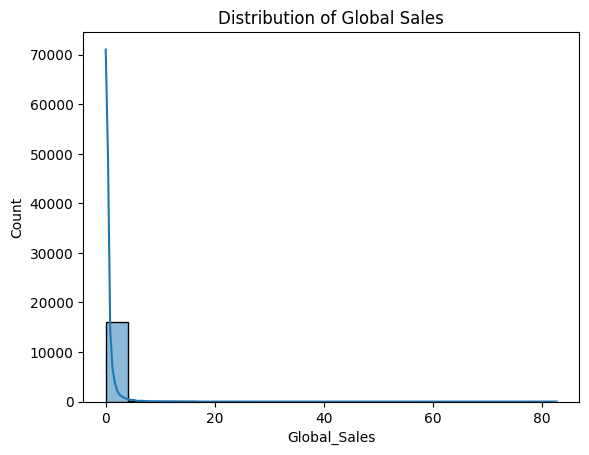

In [41]:
sns.histplot(df['Global_Sales'], bins=20, kde=True)
plt.title("Distribution of Global Sales")

In [42]:
df_encoded = pd.get_dummies(df, columns=["Platform", "Genre", "Publisher"])

In [43]:
df_encoded = df_encoded.drop(["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], axis=1)


In [44]:
X = df_encoded.drop("Global_Sales", axis=1)
y = df_encoded["Global_Sales"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Predicted vs. Actual Global Sales (with Regression Line)')

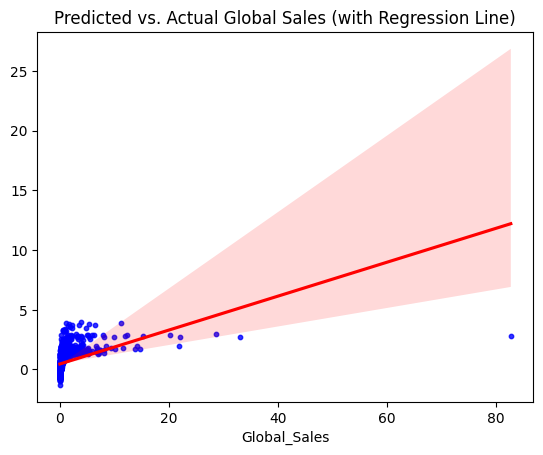

In [52]:
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title("Predicted vs. Actual Global Sales (with Regression Line)")

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.6121271381882316
R-squared: 0.15564414016884764
